In [3]:
##loading and inspecting data

In [1]:
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head()
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [4]:
##Preprocessing

In [2]:
train.fillna(method='ffill',inplace=True)

C:\Users\suhan\AppData\Local\Temp\ipykernel_13668\3262734624.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train.fillna(method='ffill',inplace=True)


In [5]:
##Encode Categorical Data

In [20]:
from sklearn.preprocessing import LabelEncoder
cat_cols=['Soil Type','Crop Type']
le=LabelEncoder()
for col in cat_cols:
    train[col]=le.fit_transform(train[col])
    test[col]=le.transform(test[col])

In [6]:
##Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
num_cols = ['Temparature','Humidity','Moisture','Nitrogen','Phosphorous','Potassium']
scaler= StandardScaler()
train[num_cols]=scaler.fit_transform(train[num_cols])
test[num_cols]=scaler.transform(test[num_cols])

In [13]:
##EDA

<Axes: xlabel='count', ylabel='Fertilizer Name'>

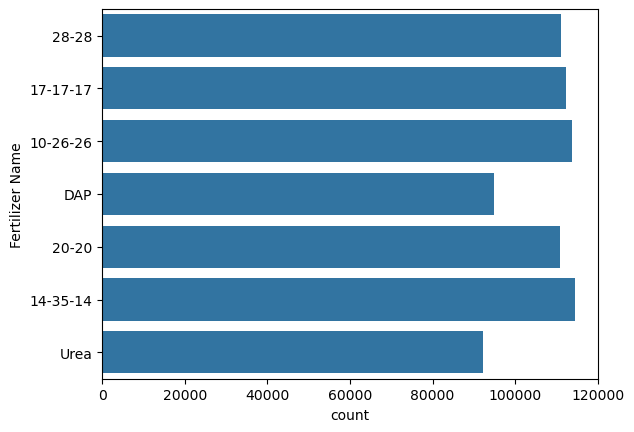

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(train['Fertilizer Name'])

In [18]:
##Train-Test_Split

In [24]:
from sklearn.model_selection import train_test_split
X=train.drop(['Fertilizer Name'],axis=1)
y= train['Fertilizer Name']
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,test_size=0.2)

In [ ]:
##Modeling(RandomForest)

In [25]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred= model.predict(X_val)

In [ ]:
##Evaluation

In [27]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy",accuracy_score(y_val,y_pred))
print(classification_report(y_val,y_pred))

Accuracy 0.16330666666666666
              precision    recall  f1-score   support

    10-26-26       0.17      0.21      0.18     22777
    14-35-14       0.17      0.21      0.19     22887
    17-17-17       0.17      0.19      0.18     22491
       20-20       0.16      0.16      0.16     22178
       28-28       0.16      0.16      0.16     22232
         DAP       0.16      0.10      0.12     18972
        Urea       0.14      0.09      0.11     18463

    accuracy                           0.16    150000
   macro avg       0.16      0.16      0.16    150000
weighted avg       0.16      0.16      0.16    150000



In [ ]:
##Feature Importance

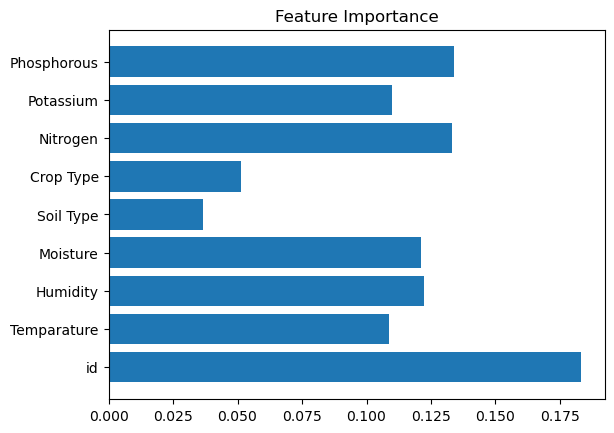

In [28]:
importances = model.feature_importances_
plt.barh(X.columns,importances)
plt.title("Feature Importance")
plt.show()

In [29]:
##Final Prediction and Analysis

In [ ]:
test_preds= model.predict(test)
submission = pd.Dataframe({
    "ID":test["ID"],
    "Fertilizer Name":test_preds
})
submission.to_csv("submission.csv",index=False)